In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from collections import Counter
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [4]:
#data set netflix content info
df = pd.read_csv('../Projects/mod 2 extra/netflix_titles.csv')

FileNotFoundError: [Errno 2] File ../Projects/mod 2 extra/netflix_titles.csv does not exist: '../Projects/mod 2 extra/netflix_titles.csv'

In [ ]:
df.shape

In [ ]:
df

In [ ]:
#seperate data set that has the IMDB ratings and the number of reviews
df2 = pd.read_csv('IMDB_results_jan-28-2020.csv')

In [ ]:
df2.sample(20)

In [ ]:
#double checking to confirm the indices between the two datasets line up
df.iloc[5880]

In [ ]:
df2.iloc[5880]

In [ ]:
#merge data sets
df = df.merge(df2, how = 'left', left_index = True, right_index = True)

In [ ]:
df.head()

In [3]:
df.info()

NameError: name 'df' is not defined

In [4]:
#convert date added to datetime for later 
df['date_added'] = pd.to_datetime(df['date_added'])


NameError: name 'df' is not defined

In [5]:
#Label null countries
df['country'] = df['country'].fillna('N/A')

NameError: name 'df' is not defined

In [6]:
country = ", ".join(df['country']).split(", ")

NameError: name 'df' is not defined

In [7]:
countri = Counter(country)

NameError: name 'country' is not defined

In [8]:
countri

NameError: name 'countri' is not defined

In [17]:
common = Counter(countri).most_common(25)

In [18]:
labels = [_[0] for _ in common][::-1]
values = [_[1] for _ in common][::-1]

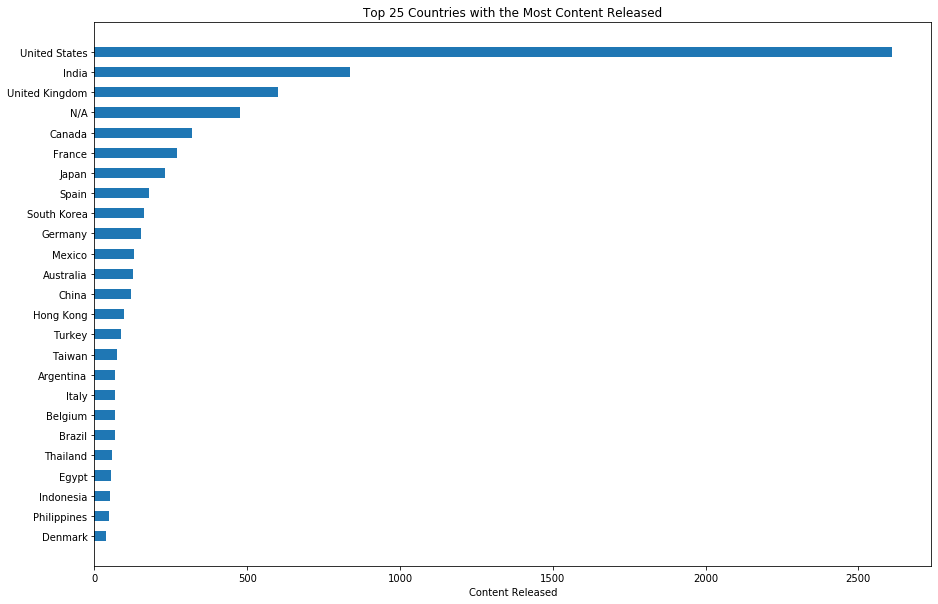

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.barh(labels, values, height = .5)
ax.set_yticks(labels)
ax.set_xlabel('Content Released')
ax.set_title('Top 25 Countries with the Most Content Released')


plt.show()
fig.savefig('top_countries.png')


In [20]:
#specifically get the average IMDB User rating
df['avg_imdb_rating'] = df['IMDB_rating'].str.split().str[0]

In [21]:
df['avg_imdb_rating'].value_counts()

Not    993
7.2    213
6.5    198
7.1    191
7.3    176
      ... 
2.7      2
2.3      2
1.6      1
9.3      1
1.9      1
Name: avg_imdb_rating, Length: 79, dtype: int64

In [22]:
#convert missing imdb ratings to 0's for later
df['avg_imdb_rating'] = np.where(df['avg_imdb_rating'] == 'Not', '0.0', df['avg_imdb_rating'])

In [23]:
df['avg_imdb_rating'] = df['avg_imdb_rating'].astype('float')

In [24]:
df.head(13)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_titleID,IMDB_rating,IMDB_title_name,avg_imdb_rating
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,/title/tt9428190/,3.1 based on 235 user ratings,Norm of the North: King Sized Adventure (2019),3.1
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,/title/tt6999080/,5.3 based on 15 user ratings,Jandino: Whatever it Takes (2016) (TV Special),5.3
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",/title/tt1659175/,"7.8 based on 4,891 user ratings",Transformers Prime (2010) (TV Series),7.8
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,/title/tt3604232/,6.0 based on 764 user ratings,Transformers: Robots in Disguise (2014) (TV S...,6.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,/title/tt6119504/,"5.2 based on 4,866 user ratings",#REALITYHIGH (2017),5.2
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,/title/tt4418844/,6.8 based on 182 user ratings,Apaches (2015) (TV Series),6.8
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",/title/tt1971325/,"6.1 based on 52,169 user ratings",Automata (I) (2014),6.1
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,/title/tt8134310/,5.1 based on 20 user ratings,Fabrizio Copano: Solo pienso en mi (2017) (TV...,5.1
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",/title/tt7293754/,6.6 based on 285 user ratings,Fire Chasers (2017) (TV Mini-Series),6.6
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,/title/tt1361318/,"5.5 based on 14,755 user ratings",Good People (2014),5.5


In [25]:
#get the number of reviews for IMDB ratings
df['num_reviews'] = df['IMDB_rating'].str.split().str[3].str.replace(',','')

In [26]:
df['num_reviews'].describe()

count     5241
unique    3473
top         11
freq        16
Name: num_reviews, dtype: object

In [27]:
#replace null values with the median
df['num_reviews'] = df['num_reviews'].fillna(df['num_reviews'].median())

In [28]:
df['num_reviews'] = df['num_reviews'].astype('int')

In [29]:
#specifically show the titleID so we can use it for the API calls later
df['IMDB_titleID'] = df['IMDB_titleID'].str.split('/').str[2]

In [30]:
df['avg_imdb_rating'].describe()

count    6234.000000
mean        5.543648
std         2.658344
min         0.000000
25%         5.100000
50%         6.400000
75%         7.300000
max         9.500000
Name: avg_imdb_rating, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          6234 non-null   int64         
 1   type             6234 non-null   object        
 2   title            6234 non-null   object        
 3   director         4265 non-null   object        
 4   cast             5664 non-null   object        
 5   country          6234 non-null   object        
 6   date_added       6223 non-null   datetime64[ns]
 7   release_year     6234 non-null   int64         
 8   rating           6224 non-null   object        
 9   duration         6234 non-null   object        
 10  listed_in        6234 non-null   object        
 11  description      6234 non-null   object        
 12  IMDB_titleID     5382 non-null   object        
 13  IMDB_rating      6234 non-null   object        
 14  IMDB_title_name  6234 non-null   object 

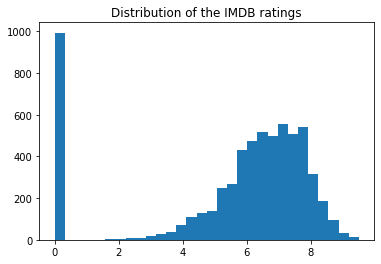

In [32]:
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
plt.hist(df['avg_imdb_rating'], bins=30)
plt.title("Distribution of the IMDB ratings")
plt.show()

In [33]:
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
df['year_added'] = pd.DatetimeIndex(df['date_added']).year



In [34]:
df['year_added'].value_counts()

2019.0    2349
2018.0    1782
2017.0    1300
2016.0     456
2020.0     184
2015.0      90
2014.0      25
2011.0      13
2013.0      12
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

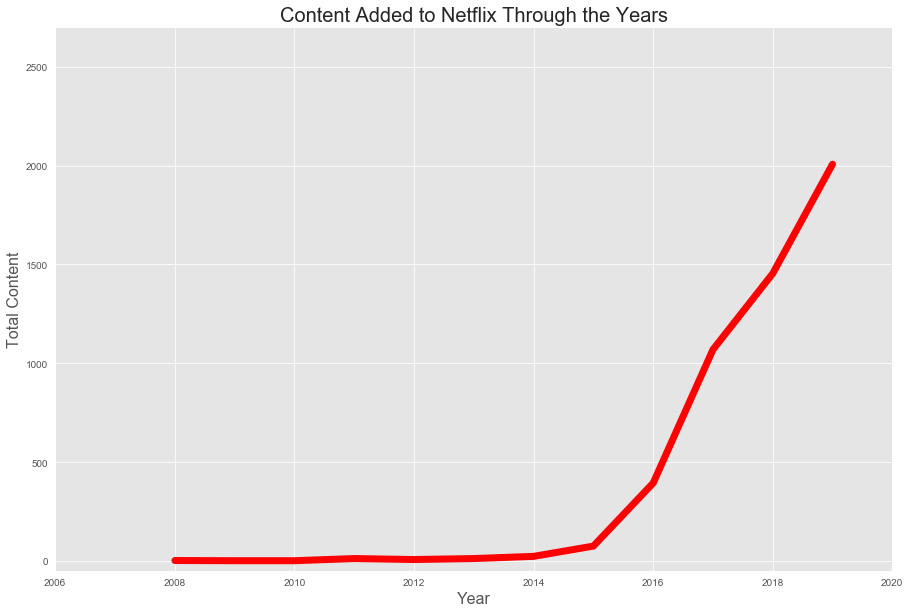

In [184]:
year_data = df['year_added'].value_counts().sort_index().loc[:2019]

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(year_data.index, year_data,  color="r", linewidth=7)
ax.set_xlabel('Year',fontsize =16)
ax.set_ylabel('Total Content',fontsize =16)
ax.set_title('Content Added to Netflix Through the Years', fontsize =20)
ax.set_xlim(2006, 2020)
ax.set_ylim(-50, 2700)
plt.show()
fig.savefig('year_added.png')


In [36]:
df['release_year'].value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1959       1
1963       1
1964       1
1956       1
1925       1
Name: release_year, Length: 72, dtype: int64

In [37]:
#function that breaks the month_added into seasons based on seasonal categorizations from box office mojo
def season(x):
    if x >= 1 and x <= 2:
        return 'Winter'
    elif x >= 3 and x <= 4:
        return 'Spring'
    elif x >= 5 and x <= 8:
        return 'Summer'
    elif x >= 9 and x <= 10:
        return 'Fall' 
    else:
        return 'Holiday'

In [38]:
df['season_added'] = df['month_added'].apply(season)


In [39]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_titleID,IMDB_rating,IMDB_title_name,avg_imdb_rating,num_reviews,month_added,year_added,season_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,tt9428190,3.1 based on 235 user ratings,Norm of the North: King Sized Adventure (2019),3.1,235,9.0,2019.0,Fall
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,tt6999080,5.3 based on 15 user ratings,Jandino: Whatever it Takes (2016) (TV Special),5.3,15,9.0,2016.0,Fall
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",tt1659175,"7.8 based on 4,891 user ratings",Transformers Prime (2010) (TV Series),7.8,4891,9.0,2018.0,Fall
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,tt3604232,6.0 based on 764 user ratings,Transformers: Robots in Disguise (2014) (TV S...,6.0,764,9.0,2018.0,Fall
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,tt6119504,"5.2 based on 4,866 user ratings",#REALITYHIGH (2017),5.2,4866,9.0,2017.0,Fall


In [40]:
#drop any missing title_IDs since we will need them for the API calls later
#also any missing title_IDS also do not have an IMDB rating which we need for our target variable
df = df.dropna(subset = ['IMDB_titleID'])

In [41]:
#function that bins netflix ratings based on Netflix documentation
def maturity(x):
    kids = ['TV-PG', 'TV-Y7-FV', 'TV-Y7', 'TV-G', 'PG', 'TV-Y', 'G']
    teens = ['TV-14', 'PG-13']
    adult = ['R','TV-MA','NC-17' ]
    if x in kids:
        return 'Kids'
    elif x in teens:
        return 'Teen'
    elif x in adult:
        return 'Adult'
    else:
        return 'NR'

In [42]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,IMDB_titleID,IMDB_rating,IMDB_title_name,avg_imdb_rating,num_reviews,month_added,year_added,season_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,tt9428190,3.1 based on 235 user ratings,Norm of the North: King Sized Adventure (2019),3.1,235,9.0,2019.0,Fall
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,tt6999080,5.3 based on 15 user ratings,Jandino: Whatever it Takes (2016) (TV Special),5.3,15,9.0,2016.0,Fall
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",tt1659175,"7.8 based on 4,891 user ratings",Transformers Prime (2010) (TV Series),7.8,4891,9.0,2018.0,Fall
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,tt3604232,6.0 based on 764 user ratings,Transformers: Robots in Disguise (2014) (TV S...,6.0,764,9.0,2018.0,Fall
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,tt6119504,"5.2 based on 4,866 user ratings",#REALITYHIGH (2017),5.2,4866,9.0,2017.0,Fall
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,tt4418844,6.8 based on 182 user ratings,Apaches (2015) (TV Series),6.8,182,9.0,2017.0,Fall
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",tt1971325,"6.1 based on 52,169 user ratings",Automata (I) (2014),6.1,52169,9.0,2017.0,Fall
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,tt8134310,5.1 based on 20 user ratings,Fabrizio Copano: Solo pienso en mi (2017) (TV...,5.1,20,9.0,2017.0,Fall
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",tt7293754,6.6 based on 285 user ratings,Fire Chasers (2017) (TV Mini-Series),6.6,285,9.0,2017.0,Fall
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,tt1361318,"5.5 based on 14,755 user ratings",Good People (2014),5.5,14755,9.0,2017.0,Fall


In [43]:
#load df with API calls for popularity scores

#the above data was combined with the data in the API calls made in the TMDB API notebook
df = pd.read_csv('df_popularity.csv', index_col = 0)

In [44]:
#replace null popularity with the median
df['popularity'] = df['popularity'].fillna(6.60)

In [45]:
df['maturity_rating'] = df['rating'].apply(maturity)

In [46]:
df['age'] = df['year_added'] - df['release_year']

In [47]:
#load TMDB meta data to get more info on directors
df_meta = pd.read_csv('movie_metadata.csv')

In [48]:
df_meta.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [49]:
#get the total gross of directors from this data set
directors = df_meta.groupby(['director_name'])['gross'].agg('sum')

In [50]:
#only show the top 500 
top_directors = directors.sort_values(ascending = False).head(500).index

In [51]:
direct = list(top_directors)

In [52]:
direct

['Steven Spielberg',
 'Peter Jackson',
 'Michael Bay',
 'Tim Burton',
 'Sam Raimi',
 'James Cameron',
 'Christopher Nolan',
 'George Lucas',
 'Joss Whedon',
 'Robert Zemeckis',
 'Chris Columbus',
 'Jon Favreau',
 'Clint Eastwood',
 'Ron Howard',
 'Francis Lawrence',
 'Ridley Scott',
 'Gore Verbinski',
 'Shawn Levy',
 'Andrew Adamson',
 'Zack Snyder',
 'Sam Mendes',
 'Bryan Singer',
 'M. Night Shyamalan',
 'Jay Roach',
 'Brett Ratner',
 'Steven Soderbergh',
 'John Lasseter',
 'Roland Emmerich',
 'Pete Docter',
 'Barry Sonnenfeld',
 'Martin Scorsese',
 'Tom Shadyac',
 'Rob Cohen',
 'Tony Scott',
 'Todd Phillips',
 'David Fincher',
 'Dennis Dugan',
 'David Yates',
 'Martin Campbell',
 'Brad Bird',
 'James Wan',
 'Joel Schumacher',
 'Eric Darnell',
 'Garry Marshall',
 'J.J. Abrams',
 'Anthony Russo',
 'Phil Lord',
 'Bill Condon',
 'Adam Shankman',
 'Lana Wachowski',
 'Tim Johnson',
 'Paul Greengrass',
 'Oliver Stone',
 'Andrew Stanton',
 'Kenneth Branagh',
 'Louis Leterrier',
 'Carlos Sald

In [53]:
top_direct = '|'.join(direct)

In [54]:
#fill null values from director column in the current df
df['director'] = df['director'].fillna('Not Listed')

In [55]:
#create dummy values for the top grossing directors to see whether or not they made content in the Netflix data
df['top_directors'] = np.where(df['director'].str.contains(top_direct), 1, 0)

In [56]:
df['top_directors'].value_counts()

0    4997
1     385
Name: top_directors, dtype: int64

In [57]:
df['avg_imdb_rating'].value_counts()

7.2    213
6.5    198
7.1    191
7.3    176
6.8    176
      ... 
9.5      2
1.7      2
9.3      1
1.9      1
1.6      1
Name: avg_imdb_rating, Length: 79, dtype: int64

In [58]:
#remove the few rows with missing ratings
df = df[df['avg_imdb_rating'] != 0]

In [59]:
df['avg_imdb_rating'].value_counts()

7.2    213
6.5    198
7.1    191
7.3    176
6.8    176
      ... 
9.5      2
1.7      2
9.3      1
1.9      1
1.6      1
Name: avg_imdb_rating, Length: 78, dtype: int64

In [60]:
df['avg_imdb_rating'].describe()

count    5241.000000
mean        6.593990
std         1.216024
min         1.600000
25%         5.900000
50%         6.700000
75%         7.500000
max         9.500000
Name: avg_imdb_rating, dtype: float64

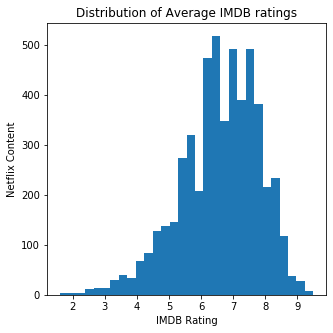

In [61]:
#check the distribution of IMDB ratings
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
fig, ax = plt.subplots(figsize=(5, 5))


ax.hist(df['avg_imdb_rating'], bins=30)
ax.set_title("Distribution of Average IMDB ratings")
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Netflix Content')
plt.show()
fig.savefig('ratings.png')

In [62]:
#Correlation between features
corr = df.corr()
corr

,release_year,avg_imdb_rating,num_reviews,month_added,year_added,budget,popularity,age,top_directors
release_year,1.000000,-0.060045,-0.178985,-0.011233,0.050981,-0.129046,-0.048137,-0.989374,-0.261221
avg_imdb_rating,-0.060045,1.000000,0.196505,0.019151,-0.006584,0.052583,0.216338,0.058400,0.002534
num_reviews,-0.178985,0.196505,1.000000,-0.045512,0.130358,0.477612,0.462562,0.196551,0.439420
month_added,-0.011233,0.019151,-0.045512,1.000000,-0.148357,-0.030523,-0.015507,-0.010401,-0.050711
year_added,0.050981,-0.006584,0.130358,-0.148357,1.000000,0.201700,0.098710,0.094763,0.192404
budget,-0.129046,0.052583,0.477612,-0.030523,0.201700,1.000000,0.572732,0.153256,0.563484
popularity,-0.048137,0.216338,0.462562,-0.015507,0.098710,0.572732,1.000000,0.059089,0.192882
age,-0.989374,0.058400,0.196551,-0.010401,0.094763,0.153256,0.059089,1.000000,0.288658
top_directors,-0.261221,0.002534,0.439420,-0.050711,0.192404,0.563484,0.192882,0.288658,1.000000


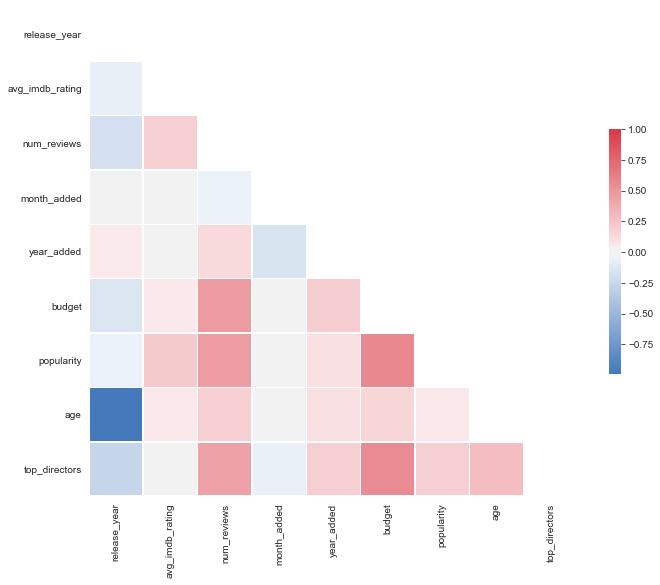

In [63]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [64]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,num_reviews,month_added,year_added,season_added,budget,imdb_id,popularity,maturity_rating,age,top_directors
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",...,235,9.0,2019.0,Fall,0.0,tt9428190,5.763,Kids,0.0,0
1,Movie,Jandino: Whatever it Takes,Not Listed,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,...,15,9.0,2016.0,Fall,0.0,tt6999080,0.600,Adult,0.0,0
2,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,...,4866,9.0,2017.0,Fall,0.0,tt6119504,16.609,Teen,0.0,0
3,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",...,52169,9.0,2017.0,Fall,7000000.0,tt1971325,20.586,Adult,3.0,0
4,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,...,20,9.0,2017.0,Fall,0.0,tt8134310,1.252,Adult,0.0,0


## Statistical Tests

#### 1) Is there a relationship between the average imdb rating and the popularity score for Netflix content?

   - h0: No, there is no relationship between the average IMDB User rating and the popularity score.
   - hA: Yes, there is a relationship between the average IMDB User rating and the popularity score.

In [65]:
#pearson's corr coeff between avg_imdb and popularity
stats.pearsonr(df['avg_imdb_rating'], df['popularity'])

(0.21633764899182079, 1.4986716125710905e-56)

In [66]:
df['popularity'].value_counts()

6.600     426
0.600     126
1.400      73
0.840      21
1.960      11
         ... 
2.231       1
1.363       1
32.741      1
1.192       1
4.105       1
Name: popularity, Length: 4017, dtype: int64

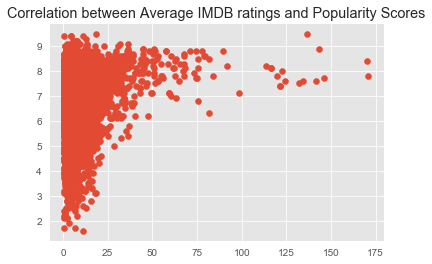

In [67]:
x = df['popularity']

y = df['avg_imdb_rating']
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(x, y)
plt.title("Correlation between Average IMDB ratings and Popularity Scores")

plt.show()

#### 2) Is there a significant difference in average IMDB user ratings between the maturity rating of Netflix conent?

   - h0: There is no significant difference in average IMDB user ratings between the Netflix content maturity ratings.
   - hA: There is a significant difference in average IMDB user ratings between the Netflix content maturity ratings.

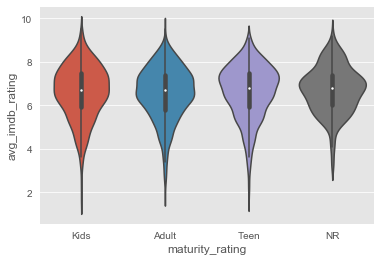

In [68]:
ax = sns.violinplot(x='maturity_rating', y='avg_imdb_rating', data=df)
fig = ax.get_figure()
fig.savefig('maturity.png')

In [69]:
#One-way ANOVA

stats.f_oneway(df['avg_imdb_rating'][df['maturity_rating'] == 'Kids'],
                df['avg_imdb_rating'][df['maturity_rating'] == 'Teen'],
                df['avg_imdb_rating'][df['maturity_rating'] == 'Adult'],
                df['avg_imdb_rating'][df['maturity_rating'] == 'NR'])

F_onewayResult(statistic=1.8524015863145589, pvalue=0.13539813322711122)

With a p-value > 0.05, we fail to reject the null hypothesis. There is no significant difference in average IMDB user ratings between the Netflix content maturity ratings.

#### 3) Is there a relationship between the season Netflix content was added and average IMDB user ratings?

   - h0: There is no relationship between the season added and the average IMDB user ratings for Netflix content.
   - hA: There is a relationship between the season added and the average IMDB user ratings for Netflix content.

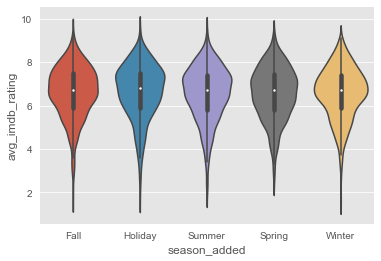

In [70]:
ax = sns.violinplot(x='season_added', y='avg_imdb_rating', data=df)
fig = ax.get_figure()
fig.savefig('season_added.png')

In [71]:
stats.f_oneway(df['avg_imdb_rating'][df['season_added'] == 'Winter'],
                df['avg_imdb_rating'][df['season_added'] == 'Spring'],
                df['avg_imdb_rating'][df['season_added'] == 'Summer'],
                df['avg_imdb_rating'][df['season_added'] == 'Fall'],
                df['avg_imdb_rating'][df['season_added'] == 'Holiday'])

F_onewayResult(statistic=1.5822755898007987, pvalue=0.17605665451465616)

With a p-value > 0.05, we fail to reject the null hypothesis. There is no relationship between the season added and the average IMDB user ratings.

#### 4) Is there a difference in average IMDB user ratings between Movies and TV shows on Netflix?

   - h0: There is no significant difference in average IMDB user ratings between Movies and TV shows on Netflix.
   - hA: There is a significant difference in average IMDB user ratings between Movies and TV shows on Netflix.

In [72]:
movie = df.groupby('type').get_group('Movie')

In [73]:
movie.shape

(3450, 25)

In [74]:
tv = df.groupby('type').get_group('TV Show')

In [75]:
tv.shape

(1791, 25)

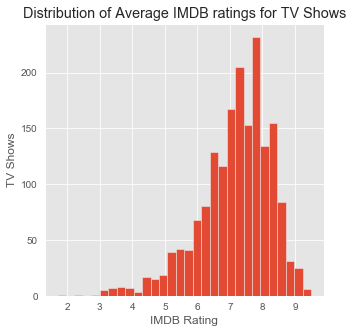

In [76]:
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(tv['avg_imdb_rating'], bins=30)
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('TV Shows')
ax.set_title("Distribution of Average IMDB ratings for TV Shows")
plt.show()
fig.savefig('tv_ratings.png')


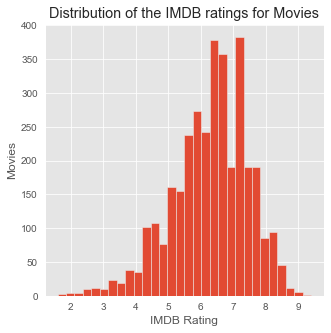

In [77]:
font = {'fontname':'Arial', 'size':'14'}
title_font = { 'weight' : 'bold','size':'16'}
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(movie['avg_imdb_rating'], bins=30)
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Movies')
ax.set_title("Distribution of the IMDB ratings for Movies")
plt.show()
fig.savefig('movie_ratings.png')


In [78]:
#Welches T-test between tv and movie avg imdb ratings
ttest_ind(movie['avg_imdb_rating'], tv['avg_imdb_rating'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-26.429089433226586, pvalue=1.457143061653054e-141)

With a p-value < 0.05, we can reject the null hypothesis. There is a significant in average IMDB user ratings between TV shows and Movies on Netflix

In [79]:
#create dummy variables for seasons
df = pd.get_dummies(df, columns = ['season_added'])

In [80]:
#create dummy variables for maturity
df = pd.get_dummies(df, columns = ['maturity_rating'])

In [81]:
categories = ", ".join(df['listed_in']).split(", ")

In [82]:
categories

['Children & Family Movies',
 'Comedies',
 'Stand-Up Comedy',
 'Comedies',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Stand-Up Comedy',
 'Action & Adventure',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 'Comedies',
 'Independent Movies',
 'Romantic Movies',
 'Action & Adventure',
 'Comedies',
 'International Movies',
 'Documentaries',
 'Horror Movies',
 'Thrillers',
 'Dramas',
 'Independent Movies',
 'Dramas',
 'Independent Movies',
 'Romantic Movies',
 'Horror Movies',
 'International Movies',
 'Children & Family Movies',
 'Comedies',
 'Sci-Fi & Fantasy',
 'Comedies',
 'Romantic Movies',
 'Dramas',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Dramas',
 'International Movies',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Comedies',
 'International Movies',
 'Comedies',
 'International Movies',
 'Romantic Movies',
 'Action & Adventure',
 'Comedies',
 'Independent Mov

In [83]:
netflix_categories = list(Counter(categories).keys())

In [84]:
netflix_categories

['Children & Family Movies',
 'Comedies',
 'Stand-Up Comedy',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Independent Movies',
 'Romantic Movies',
 'Documentaries',
 'Horror Movies',
 'Music & Musicals',
 'Anime Features',
 'Faith & Spirituality',
 'Cult Movies',
 'Movies',
 'Classic Movies',
 'Sports Movies',
 'LGBTQ Movies',
 "Kids' TV",
 'Crime TV Shows',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'Docuseries',
 'Science & Nature TV',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Thrillers',
 'TV Mysteries',
 'British TV Shows',
 'Reality TV',
 'TV Action & Adventure',
 'Teen TV Shows',
 'Korean TV Shows',
 'Anime Series',
 'TV Horror',
 'Stand-Up Comedy & Talk Shows',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'Classic & Cult TV']

In [85]:
#create dummy variables for netflix categories aka genres
for col in netflix_categories:
    df[col] = np.where(df['listed_in'].str.contains(col), 1, 0)

In [86]:
df.head(25)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,Reality TV,TV Action & Adventure,Teen TV Shows,Korean TV Shows,Anime Series,TV Horror,Stand-Up Comedy & Talk Shows,TV Sci-Fi & Fantasy,TV Shows,Classic & Cult TV
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",...,0,0,0,0,0,0,0,0,0,0
1,Movie,Jandino: Whatever it Takes,Not Listed,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,...,0,0,0,0,0,0,0,0,0,0
2,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,...,0,0,0,0,0,0,0,0,0,0
3,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",...,0,0,0,0,0,0,0,0,0,0
4,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,...,0,0,0,0,0,0,0,0,0,0
5,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",...,0,0,0,0,0,0,0,0,0,0
6,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies",...,0,0,0,0,0,0,0,0,0,0
7,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",...,0,0,0,0,0,0,0,0,0,0
8,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...",...,0,0,0,0,0,0,0,0,0,0
9,Movie,Rolling Papers,Mitch Dickman,NaN,"United States, Uruguay",2017-09-08,2015,TV-MA,79 min,Documentaries,...,0,0,0,0,0,0,0,0,0,0


In [87]:
countries = list(Counter(countri).keys())

In [88]:
countries

['United States',
 'India',
 'South Korea',
 'China',
 'United Kingdom',
 'Spain',
 'Bulgaria',
 'Canada',
 'Chile',
 'Denmark',
 'Sweden',
 'N/A',
 'Netherlands',
 'Belgium',
 'France',
 'Uruguay',
 'United States,',
 'Thailand',
 'Pakistan',
 'Turkey',
 'Brazil',
 'Italy',
 'Indonesia',
 'Ireland',
 'Hong Kong',
 'Morocco',
 'Mexico',
 'Vietnam',
 'Argentina',
 'Nigeria',
 'Japan',
 'Germany',
 'Greece',
 'Norway',
 'Switzerland',
 'United Arab Emirates',
 'Lebanon',
 'Cambodia',
 'Russia',
 'Poland',
 'Israel',
 'Australia',
 'Portugal',
 'Egypt',
 'Taiwan',
 'Austria',
 'Czech Republic',
 'Senegal',
 'Soviet Union',
 'Peru',
 'Ukraine',
 'Malaysia',
 'South Africa',
 'Nepal',
 'Philippines',
 'Serbia',
 'Colombia',
 'Singapore',
 'Luxembourg',
 'West Germany',
 'Cayman Islands',
 'New Zealand',
 'Venezuela',
 'Jordan',
 'Saudi Arabia',
 'Iceland',
 'Poland,',
 'Malta',
 'Qatar',
 'United Kingdom,',
 'Iran',
 'Finland',
 'Iraq',
 'Liechtenstein',
 'Albania',
 'Slovakia',
 'Samoa',
 

In [89]:
#create dummy variables for the countries
for col in countries:
    df[col] = np.where(df['country'].str.contains(col), 1, 0)

In [90]:
df.head(20)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,Mauritius,Nicaragua,Kazakhstan,Armenia,Mongolia,Bermuda,Ecuador,Syria,Kuwait,Cyprus
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",...,0,0,0,0,0,0,0,0,0,0
1,Movie,Jandino: Whatever it Takes,Not Listed,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,...,0,0,0,0,0,0,0,0,0,0
2,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,...,0,0,0,0,0,0,0,0,0,0
3,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",...,0,0,0,0,0,0,0,0,0,0
4,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,...,0,0,0,0,0,0,0,0,0,0
5,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",...,0,0,0,0,0,0,0,0,0,0
6,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies",...,0,0,0,0,0,0,0,0,0,0
7,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",...,0,0,0,0,0,0,0,0,0,0
8,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...",...,0,0,0,0,0,0,0,0,0,0
9,Movie,Rolling Papers,Mitch Dickman,NaN,"United States, Uruguay",2017-09-08,2015,TV-MA,79 min,Documentaries,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df = pd.get_dummies(df, columns=['rating'])

In [92]:
df.head()

,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,...,0,0,0,0,0,1,0,0,0,0
1,Movie,Jandino: Whatever it Takes,Not Listed,Jandino Asporaat,United Kingdom,2016-09-09,2016,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,...,0,0,0,0,1,0,0,0,0,0
2,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,99 min,Comedies,When nerdy high schooler Dani finally attracts...,...,0,0,1,0,0,0,0,0,0,0
3,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",...,0,1,0,0,0,0,0,0,0,0
4,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,...,0,0,0,0,1,0,0,0,0,0


In [93]:
#nearly half the data is missing a budget so ultimately dropping this
df.budget.value_counts()

0.0           2544
10000000.0      39
5000000.0       33
20000000.0      27
40000000.0      21
              ... 
150000.0         1
6976542.0        1
6750000.0        1
92000000.0       1
15000.0          1
Name: budget, Length: 289, dtype: int64

In [94]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description',
       ...
       'rating_PG-13', 'rating_R', 'rating_TV-14', 'rating_TV-G',
       'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7',
       'rating_TV-Y7-FV', 'rating_UR'],
      dtype='object', length=201)

In [95]:
#drop columns I likely won't need before splitting the data
df = df.drop(columns = ['season_added_Holiday', 'country', 'listed_in', 'IMDB_titleID', 'IMDB_rating', 'IMDB_title_name', 'budget', 'imdb_id'])

In [96]:
df.head()

,type,title,director,cast,date_added,release_year,duration,description,avg_imdb_rating,num_reviews,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",2019-09-09,2019,90 min,Before planning an awesome wedding for his gra...,3.1,235,...,0,0,0,0,0,1,0,0,0,0
1,Movie,Jandino: Whatever it Takes,Not Listed,Jandino Asporaat,2016-09-09,2016,94 min,Jandino Asporaat riffs on the challenges of ra...,5.3,15,...,0,0,0,0,1,0,0,0,0,0
2,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",2017-09-08,2017,99 min,When nerdy high schooler Dani finally attracts...,5.2,4866,...,0,0,1,0,0,0,0,0,0,0
3,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...",2017-09-08,2014,110 min,"In a dystopian future, an insurance adjuster f...",6.1,52169,...,0,1,0,0,0,0,0,0,0,0
4,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,2017-09-08,2017,60 min,Fabrizio Copano takes audience participation t...,5.1,20,...,0,0,0,0,1,0,0,0,0,0


In [97]:
#show only TV Shows
tv = df.groupby('type').get_group('TV Show').reset_index()

In [98]:
#show only Movies
movie = df.groupby('type').get_group('Movie').reset_index()

In [99]:
#Movie duration into int
movie['duration'] = movie['duration'].str.split().str[0]
movie['duration'] = movie['duration'].astype('int')

In [100]:
#TV duration into int
tv['duration_seasons'] = tv['duration'].str.split().str[0]
tv['duration_seasons'] = tv['duration_seasons'].astype('int')

In [101]:
tv.shape

(1791, 195)

In [102]:
df['avg_imdb_rating'].isnull().sum()

0

In [103]:
df['popularity'].describe()

count    5241.000000
mean        9.193320
std        11.597213
min         0.600000
25%         3.192000
50%         6.600000
75%        11.326000
max       170.981000
Name: popularity, dtype: float64

In [104]:
df['popularity'].isnull().sum()

0

In [105]:
df_subset = pd.get_dummies(df, columns = ['type'])

In [106]:
df.head()

,type,title,director,cast,date_added,release_year,duration,description,avg_imdb_rating,num_reviews,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",2019-09-09,2019,90 min,Before planning an awesome wedding for his gra...,3.1,235,...,0,0,0,0,0,1,0,0,0,0
1,Movie,Jandino: Whatever it Takes,Not Listed,Jandino Asporaat,2016-09-09,2016,94 min,Jandino Asporaat riffs on the challenges of ra...,5.3,15,...,0,0,0,0,1,0,0,0,0,0
2,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",2017-09-08,2017,99 min,When nerdy high schooler Dani finally attracts...,5.2,4866,...,0,0,1,0,0,0,0,0,0,0
3,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...",2017-09-08,2014,110 min,"In a dystopian future, an insurance adjuster f...",6.1,52169,...,0,1,0,0,0,0,0,0,0,0
4,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,2017-09-08,2017,60 min,Fabrizio Copano takes audience participation t...,5.1,20,...,0,0,0,0,1,0,0,0,0,0


In [107]:
df_subset = df_subset.drop(columns = ['title','director','cast','date_added','duration','description','TV Sci-Fi & Fantasy','Vatican City', 'rating_UR', 'type_TV Show', 'maturity_rating_NR'])

In [108]:
df_subset = df_subset.dropna()

## Modeling Combined Data

In [109]:
target = df_subset['avg_imdb_rating']

In [110]:
df_subset.head()

,release_year,avg_imdb_rating,num_reviews,month_added,year_added,popularity,age,top_directors,season_added_Fall,season_added_Spring,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,type_Movie
0,2019,3.1,235,9.0,2019.0,5.763,0.0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,5.3,15,9.0,2016.0,0.600,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,5.2,4866,9.0,2017.0,16.609,0.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,2014,6.1,52169,9.0,2017.0,20.586,3.0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,2017,5.1,20,9.0,2017.0,1.252,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [111]:
df_features = df_subset.drop(columns = ['avg_imdb_rating'])

In [112]:
df_features.shape

(5231, 182)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=22,test_size=0.2)


In [114]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [115]:
#OLS regular 

X= sm.add_constant(X_train)
Y= y_train.values.reshape(-1,1)  
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.91
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          3.51e-281
Time:                        05:58:25   Log-Likelihood:                -5785.4
No. Observations:                4184   AIC:                         1.190e+04
Df Residuals:                    4019   BIC:                         1.295e+04
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.6072      0.015    434.304      0.000       6.577       6.637
release_year                    -0.0542      0.011     -5.034      0.000      -0.075      -0.033
num_reviews                      0.2173      0.020     10.948      0.000       0.178       0.256
month_added                      0.0680      0.077      0.882      0.378      -0.083       0.219
year_added                       0.0431      0.017      2.488      0.013       0.009       0.077
popularity                       0.1682      0.021      8.160      0.000       0.128       0.209
age                              0.0601      0.011      5.555      0.000       0.039       0.081
top_directors                    0.0502      0.020      2.483      0.013       0.011       0.090
season_added_Fall               -0.0041      0.025     -0.161      0.872      -0.053       0.045
season_added_Spring              0.0233      0.066      0.356      0.722      -0.105       0.152
season_added_Summer             -0.0217      0.052     -0.420      0.674      -0.123       0.079
season_added_Winter              0.0369      0.082      0.449      0.654      -0.124       0.198
maturity_rating_Adult           -0.3467      0.097     -3.575      0.000      -0.537      -0.157
maturity_rating_Kids            -0.2618      0.082     -3.183      0.001      -0.423      -0.101
maturity_rating_Teen            -0.3169      0.087     -3.644      0.000      -0.487      -0.146
Children & Family Movies        -0.0287      0.027     -1.060      0.289      -0.082       0.024
Comedies                        -0.0536      0.024     -2.213      0.027      -0.101      -0.006
Stand-Up Comedy                  0.2663      0.025     10.667      0.000       0.217       0.315
International Movies             0.0095      0.038      0.248      0.804      -0.065       0.084
Sci-Fi & Fantasy                -0.0293      0.017     -1.732      0.083      -0.062       0.004
Thrillers                       -0.0280      0.020     -1.424      0.154      -0.067       0.011
Action & Adventure              -0.1087      0.023     -4.744      0.000      -0.154      -0.064
Dramas                           0.2136      0.028      7.608      0.000       0.159       0.269
Independent Movies               0.0340      0.021      1.612      0.107      -0.007       0.075
Romantic Movies                 -0.0306      0.018     -1.664      0.096      -0.067       0.005
Documentaries                    0.3936      0.026     14.971      0.000       0.342       0.445
Horror Movies                   -0.1031      0.020     -5.221      0.000      -0.142      -0.064
Music & Musicals                -0.0346      0.016     -2.142      0.032      -0.066      -0.003
Anime Features                   0.1017      0.019      5.397      0.000    

#### K-best

In [116]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)

selector.fit(X_train, y_train)

SelectKBest(k=15, score_func=<function f_regression at 0x7fd9205e8c20>)

In [117]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [118]:
list(removed_columns)

['release_year',
 'month_added',
 'year_added',
 'age',
 'top_directors',
 'season_added_Fall',
 'season_added_Spring',
 'season_added_Summer',
 'season_added_Winter',
 'maturity_rating_Adult',
 'maturity_rating_Kids',
 'maturity_rating_Teen',
 'Stand-Up Comedy',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Action & Adventure',
 'Dramas',
 'Independent Movies',
 'Romantic Movies',
 'Documentaries',
 'Music & Musicals',
 'Anime Features',
 'Faith & Spirituality',
 'Cult Movies',
 'Classic Movies',
 'Sports Movies',
 'LGBTQ Movies',
 "Kids' TV",
 'Spanish-Language TV Shows',
 'Science & Nature TV',
 'TV Comedies',
 'TV Thrillers',
 'TV Mysteries',
 'Reality TV',
 'TV Action & Adventure',
 'Teen TV Shows',
 'Korean TV Shows',
 'Anime Series',
 'TV Horror',
 'Stand-Up Comedy & Talk Shows',
 'Classic & Cult TV',
 'United States',
 'India',
 'South Korea',
 'China',
 'United Kingdom',
 'Spain',
 'Bulgaria',
 'Canada',
 'Chile',
 'Denmark',
 'Sweden',
 'N/A',
 'Netherlands',
 'Belgium',
 'France',
 '

In [119]:
list(selected_columns)

['num_reviews',
 'popularity',
 'Children & Family Movies',
 'Comedies',
 'International Movies',
 'Horror Movies',
 'Movies',
 'Crime TV Shows',
 'International TV Shows',
 'Docuseries',
 'Romantic TV Shows',
 'TV Dramas',
 'British TV Shows',
 'TV Shows',
 'type_Movie']

In [120]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


Training Root Mean Squared Error: 1.070800632215743
Testing Root Mean Squared Error: 1.0927270714994386


#### Recursive

In [121]:
from sklearn.feature_selection import RFECV
ols = linear_model.LinearRegression()

In [122]:
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

selector.fit(X_train, y_train)


RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [123]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [124]:
list(removed_rfe)

['month_added',
 'year_added',
 'popularity',
 'top_directors',
 'season_added_Fall',
 'season_added_Spring',
 'season_added_Summer',
 'season_added_Winter',
 'maturity_rating_Adult',
 'maturity_rating_Kids',
 'maturity_rating_Teen',
 'Children & Family Movies',
 'Comedies',
 'Stand-Up Comedy',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Action & Adventure',
 'Independent Movies',
 'Romantic Movies',
 'Horror Movies',
 'Music & Musicals',
 'Anime Features',
 'Faith & Spirituality',
 'Cult Movies',
 'Movies',
 'Classic Movies',
 'Sports Movies',
 'LGBTQ Movies',
 "Kids' TV",
 'Crime TV Shows',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'Docuseries',
 'Science & Nature TV',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Thrillers',
 'TV Mysteries',
 'British TV Shows',
 'Reality TV',
 'TV Action & Adventure',
 'Teen TV Shows',
 'Korean TV Shows',
 'Anime Series',
 'TV Horror',
 'Stand-Up Comedy & Talk Shows',
 'TV Shows',
 'Classic & Cult TV',
 

In [125]:
list(selected_rfe)

['release_year',
 'num_reviews',
 'age',
 'Dramas',
 'Documentaries',
 'N/A',
 'Egypt',
 'Austria',
 'Cayman Islands',
 'Iran',
 'Iraq',
 'Slovakia',
 'Guatemala',
 'Malawi',
 'Paraguay',
 'Somalia',
 'Kenya',
 'Sudan',
 'Slovenia',
 'Montenegro',
 'Bangladesh',
 'Georgia',
 'Namibia',
 'Cuba',
 'Azerbaijan',
 'Nicaragua',
 'Kazakhstan',
 'Armenia',
 'Mongolia',
 'Bermuda',
 'Syria',
 'Kuwait',
 'Cyprus',
 'rating_PG-13',
 'rating_TV-14',
 'type_Movie']

In [126]:
len(list(removed_rfe))

146

In [127]:
lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print(" KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 1.0518084569395432
Testing Root Mean Squared Error: 1.0892487886094375
 KBest:  1.0927270714994386 vs. RFE:  1.0892487886094375


#### Lasso


In [128]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

trainL_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
testL_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(trainL_rmse) )
print('Testing Error: '+ str(testL_rmse) )

print('KBest: ', testK_rmse, "vs. RFE: ", testRFE_rmse, "vs. Lasso: ", testL_rmse)

Training Error: 0.7521252301406197
Testing Error: 1.0299627233603825
KBest:  1.0927270714994386 vs. RFE:  1.0892487886094375 vs. Lasso:  1.0299627233603825


Looks like Lasso performed the best on the combined data set

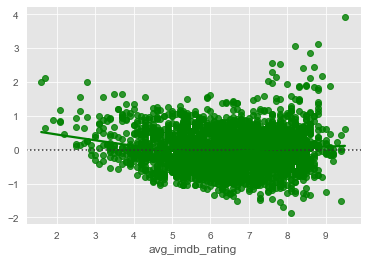

In [129]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

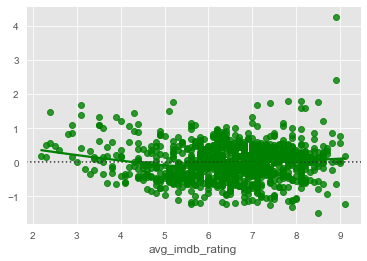

In [130]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

In [131]:

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(df_features,target)

target_pred = lasso.predict(df_features)

rmse = np.sqrt(metrics.mean_squared_error(target, target_pred))
print('Target Error: '+ str(rmse) )

Target Error: 1.0274371253083507


## Modeling Movie Data

In [132]:
#dropped tv related categories and ratings and other features

movie_subset = movie.drop(columns = ['index','type','title','director','cast','date_added','description', "Kids' TV", 'Crime TV Shows',
                                     'International TV Shows','Spanish-Language TV Shows','Science & Nature TV',
                                     'Romantic TV Shows','TV Comedies','TV Dramas','TV Thrillers','TV Mysteries',
                                     'British TV Shows','Reality TV','TV Action & Adventure','Teen TV Shows',
                                     'Korean TV Shows','TV Horror','TV Shows','Classic & Cult TV','rating_TV-14',
                                     'rating_TV-G','rating_TV-MA','rating_TV-PG','rating_TV-Y','rating_TV-Y7',
                                     'rating_TV-Y7-FV','TV Sci-Fi & Fantasy','Vatican City', 'rating_UR', 'maturity_rating_NR'])


In [133]:
movie_subset = movie_subset.dropna()

In [134]:
movie_target = movie_subset['avg_imdb_rating']

In [135]:
movie_features = movie_subset.drop(columns = ['avg_imdb_rating'])

In [136]:
movie_features.head()

,release_year,duration,num_reviews,month_added,year_added,popularity,age,top_directors,season_added_Fall,season_added_Spring,...,Ecuador,Syria,Kuwait,Cyprus,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R
0,2019,90,235,9.0,2019.0,5.763,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,94,15,9.0,2016.0,0.600,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,99,4866,9.0,2017.0,16.609,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,110,52169,9.0,2017.0,20.586,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2017,60,20,9.0,2017.0,1.252,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
X3_train, X3_test, y3_train, y3_test = train_test_split(movie_features, movie_target, random_state=22,test_size=0.2)


In [138]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X3_train)

#transform the training data
X3_train = pd.DataFrame(data=scaler.transform(X3_train), columns=movie_features.columns)

#transform the testing dat
X3_test = pd.DataFrame(data=scaler.transform(X3_test), columns=movie_features.columns)

In [139]:
#OLS for movie data

X= sm.add_constant(X3_train)
Y= y3_train.values.reshape(-1,1)  
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     10.56
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          1.67e-164
Time:                        05:58:41   Log-Likelihood:                -3745.0
No. Observations:                2760   AIC:                             7764.
Df Residuals:                    2623   BIC:                             8575.
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            6.2953      0.018    343.059      0.000       6.259       6.331
release_year                    -0.0705      0.013     -5.447      0.000      -0.096      -0.045
duration                         0.1686      0.028      5.973      0.000       0.113       0.224
num_reviews                      0.1642      0.028      5.928      0.000       0.110       0.219
month_added                      0.0690      0.095      0.725      0.468      -0.118       0.256
year_added                       0.0106      0.022      0.486      0.627      -0.032       0.053
popularity                       0.2854      0.033      8.570      0.000       0.220       0.351
age                              0.0709      0.013      5.580      0.000       0.046       0.096
top_directors                    0.0469      0.025      1.893      0.059      -0.002       0.096
season_added_Fall                0.0055      0.030      0.183      0.855      -0.053       0.064
season_added_Spring              0.0380      0.080      0.473      0.636      -0.119       0.195
season_added_Summer             -0.0077      0.062     -0.124      0.902      -0.129       0.114
season_added_Winter              0.0249      0.102      0.243      0.808      -0.176       0.225
maturity_rating_Adult           -0.2861      0.184     -1.555      0.120      -0.647       0.075
maturity_rating_Kids            -0.1023      0.147     -0.696      0.487      -0.391       0.186
maturity_rating_Teen            -0.2321      0.173     -1.341      0.180      -0.571       0.107
Children & Family Movies        -0.0493      0.032     -1.531      0.126      -0.112       0.014
Comedies                        -0.0897      0.025     -3.622      0.000      -0.138      -0.041
Stand-Up Comedy                  0.3353      0.029     11.674      0.000       0.279       0.392
International Movies            -0.0540      0.044     -1.240      0.215      -0.139       0.031
Sci-Fi & Fantasy                -0.0405      0.020     -1.982      0.048      -0.081      -0.000
Thrillers                       -0.0705      0.022     -3.176      0.002      -0.114      -0.027
Action & Adventure              -0.1683      0.025     -6.817      0.000      -0.217      -0.120
Dramas                           0.1696      0.029      5.864      0.000       0.113       0.226
Independent Movies               0.0351      0.025      1.424      0.154      -0.013       0.084
Romantic Movies                 -0.0748      0.022     -3.401      0.001      -0.118      -0.032
Documentaries                    0.4687      0.031     15.131      0.000       0.408       0.529
Horror Movies                   -0.1605      0.024     -6.711      0.000      -0.207      -0.114
Music & Musicals                -0.0616      0.020     -3.133      0.002    

In [140]:
#K-best Model for movie data
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)

selector.fit(X3_train, y3_train)

/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=15, score_func=<function f_regression at 0x7fd9205e8c20>)

In [141]:
selected_columns = X3_train.columns[selector.get_support()]
removed_columns = X3_train.columns[~selector.get_support()]

In [142]:
list(removed_columns)

['month_added',
 'year_added',
 'season_added_Fall',
 'season_added_Spring',
 'season_added_Summer',
 'season_added_Winter',
 'maturity_rating_Adult',
 'maturity_rating_Kids',
 'maturity_rating_Teen',
 'International Movies',
 'Sci-Fi & Fantasy',
 'Action & Adventure',
 'Independent Movies',
 'Romantic Movies',
 'Music & Musicals',
 'Anime Features',
 'Faith & Spirituality',
 'Cult Movies',
 'Movies',
 'Sports Movies',
 'LGBTQ Movies',
 'Docuseries',
 'Anime Series',
 'Stand-Up Comedy & Talk Shows',
 'United States',
 'India',
 'South Korea',
 'China',
 'Spain',
 'Bulgaria',
 'Canada',
 'Chile',
 'Denmark',
 'Sweden',
 'N/A',
 'Netherlands',
 'Belgium',
 'France',
 'Uruguay',
 'United States,',
 'Thailand',
 'Pakistan',
 'Turkey',
 'Brazil',
 'Italy',
 'Indonesia',
 'Ireland',
 'Hong Kong',
 'Morocco',
 'Mexico',
 'Vietnam',
 'Argentina',
 'Nigeria',
 'Japan',
 'Germany',
 'Greece',
 'Norway',
 'Switzerland',
 'United Arab Emirates',
 'Lebanon',
 'Cambodia',
 'Russia',
 'Poland',
 'Isr

In [143]:
list(selected_columns)

['release_year',
 'duration',
 'num_reviews',
 'popularity',
 'age',
 'top_directors',
 'Children & Family Movies',
 'Comedies',
 'Stand-Up Comedy',
 'Thrillers',
 'Dramas',
 'Documentaries',
 'Horror Movies',
 'Classic Movies',
 'United Kingdom']

In [144]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X3_train[selected_columns], y3_train)

y3_train_kbest = lm_kbest.predict(X3_train[selected_columns])


train3K_rmse = np.sqrt(metrics.mean_squared_error(y3_train, y3_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y3_kbest = lm_kbest.predict(X3_test[selected_columns])

test3K_rmse = np.sqrt(metrics.mean_squared_error(y3_test, y3_kbest))

print('Testing Root Mean Squared Error:' , test3K_rmse)

Training Root Mean Squared Error: 1.070800632215743
Testing Root Mean Squared Error: 1.0057735971784822


In [187]:
## Movie Lasso 
from sklearn.linear_model import Lasso

lasso2 = Lasso(alpha=0.01, normalize=False)

lasso2.fit(X3_train,y3_train)

y3_train_pred = lasso2.predict(X3_train)
y3_pred = lasso2.predict(X3_test)

train3L_rmse = metrics.mean_absolute_error(y3_train, y3_train_pred)
test3L_rmse = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))
print('Training Error: '+ str(train3L_rmse) )
print('Testing Error: '+ str(test3L_rmse) )
print('KBest: ', test3K_rmse, "vs. LASSO: ", test3L_rmse)

Training Error: 0.7275506951671284
Testing Error: 0.9629429947392784
KBest:  1.0057735971784822 vs. LASSO:  0.9629429947392784


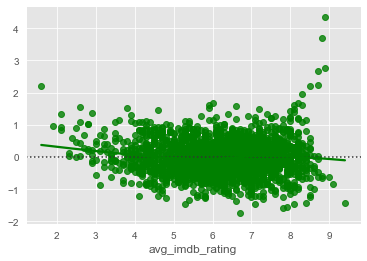

In [146]:
sns.residplot( y3_train, y3_train_pred,lowess=True, color="g")

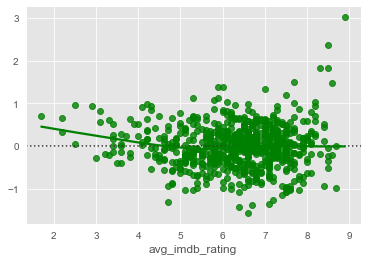

In [147]:
sns.residplot( y3_test, y3_pred, lowess=True, color="g")

With Lasso being our best model, we will now check to run this on the full Movie data set.

In [189]:
import pickle
filename = 'finalized_movie__model.sav'
pickle.dump(lasso2, open(filename, 'wb'))

In [192]:
# 32% accuracy
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X3_test,y3_test)
print(result)

0.3258868344831122


In [148]:

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(movie_features,movie_target)

movie_target_pred = lasso.predict(movie_features)

movie_rmse = np.sqrt(metrics.mean_squared_error(movie_target, movie_target_pred))
print('Target Error: '+ str(movie_rmse) )

Target Error: 0.9899032010666834


## TV Show Modeling

In [149]:
#drop Movie-related features and others
tv_subset = tv.drop(columns = ['index', 'type','title','director','duration','cast','date_added','description', 
                               'TV Sci-Fi & Fantasy','Vatican City', 'rating_UR', 'maturity_rating_NR',
                              'Children & Family Movies','Comedies', 'Stand-Up Comedy', 'International Movies',
                               'Sci-Fi & Fantasy','Thrillers','Action & Adventure','Dramas','Independent Movies',
                               'Romantic Movies','Documentaries','Horror Movies','Music & Musicals','Anime Features',
                               'Faith & Spirituality','Cult Movies','Movies','Classic Movies','Sports Movies','LGBTQ Movies'])


In [150]:
tv_subset = tv_subset.dropna()

In [151]:
tv_target = tv_subset['avg_imdb_rating']

In [152]:
tv_subset.head()

,release_year,avg_imdb_rating,num_reviews,month_added,year_added,popularity,age,top_directors,season_added_Fall,season_added_Spring,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,duration_seasons
0,2013,7.8,4891,9.0,2018.0,16.776,5.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1,2016,6.0,764,9.0,2018.0,9.642,2.0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,2016,6.8,182,9.0,2017.0,4.127,1.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,6.6,285,9.0,2017.0,1.400,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,2015,6.6,5,9.0,2018.0,6.600,3.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [153]:
tv_features = tv_subset.drop(columns = ['avg_imdb_rating'])

In [154]:
tv_features.head()

,release_year,num_reviews,month_added,year_added,popularity,age,top_directors,season_added_Fall,season_added_Spring,season_added_Summer,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,duration_seasons
0,2013,4891,9.0,2018.0,16.776,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2016,764,9.0,2018.0,9.642,2.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2016,182,9.0,2017.0,4.127,1.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2017,285,9.0,2017.0,1.400,0.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2015,5,9.0,2018.0,6.600,3.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [155]:
X4_train, X4_test, y4_train, y4_test = train_test_split(tv_features, tv_target, random_state=22,test_size=0.2)


In [156]:
#Scaling TV data
scaler = StandardScaler()

scaler.fit(X4_train)

X4_train = pd.DataFrame(data=scaler.transform(X4_train), columns=tv_features.columns)

X4_test = pd.DataFrame(data=scaler.transform(X4_test), columns=tv_features.columns)

In [157]:
#OLS Regression for TV shows
 
X= sm.add_constant(X4_train)
Y= y4_train.values.reshape(-1,1)  
lr_model=sm.OLS(Y,X).fit()
lr_model.summary()

/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     4.056
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           2.46e-31
Time:                        05:58:42   Log-Likelihood:                -1962.0
No. Observations:                1424   AIC:                             4120.
Df Residuals:                    1326   BIC:                             4636.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            7.1624      0.026    271.763      0.000       7.111       7.214
release_year                    -0.0003      0.015     -0.018      0.985      -0.030       0.030
num_reviews                      0.0929      0.031      2.974      0.003       0.032       0.154
month_added                     -0.0224      0.132     -0.170      0.865      -0.281       0.236
year_added                       0.0627      0.029      2.146      0.032       0.005       0.120
popularity                       0.1260      0.039      3.262      0.001       0.050       0.202
age                              0.0152      0.018      0.863      0.388      -0.019       0.050
top_directors                   -0.0064      0.028     -0.234      0.815      -0.061       0.048
season_added_Fall                0.0190      0.044      0.428      0.668      -0.068       0.106
season_added_Spring             -0.0170      0.112     -0.152      0.879      -0.237       0.203
season_added_Summer             -0.0611      0.089     -0.683      0.495      -0.236       0.114
season_added_Winter             -0.0150      0.135     -0.112      0.911      -0.279       0.249
maturity_rating_Adult           -0.4697      0.248     -1.894      0.059      -0.956       0.017
maturity_rating_Kids            -0.4838      0.261     -1.857      0.064      -0.995       0.027
maturity_rating_Teen            -0.4706      0.241     -1.950      0.051      -0.944       0.003
Kids' TV                        -0.3170      0.069     -4.585      0.000      -0.453      -0.181
Crime TV Shows                   0.0389      0.038      1.016      0.310      -0.036       0.114
International TV Shows          -0.0063      0.054     -0.117      0.907      -0.113       0.100
Spanish-Language TV Shows       -0.1007      0.047     -2.126      0.034      -0.194      -0.008
Docuseries                       0.0482      0.044      1.107      0.269      -0.037       0.134
Science & Nature TV              0.0211      0.031      0.676      0.499      -0.040       0.082
Romantic TV Shows                0.0636      0.035      1.792      0.073      -0.006       0.133
TV Comedies                     -0.0302      0.038     -0.800      0.424      -0.104       0.044
TV Dramas                        0.0346      0.042      0.820      0.412      -0.048       0.118
TV Thrillers                    -0.0093      0.028     -0.330      0.741      -0.064       0.046
TV Mysteries                    -0.0477      0.030     -1.572      0.116      -0.107       0.012
British TV Shows                 0.0489      0.064      0.761      0.447      -0.077       0.175
Reality TV                      -0.1486      0.035     -4.227      0.000      -0.218      -0.080
TV Action & Adventure           -0.0155      0.031     -0.508      0.612    

In [158]:
#K-best
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)

selector.fit(X4_train, y4_train)

/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/danielmocombe/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=15, score_func=<function f_regression at 0x7fd9205e8c20>)

In [159]:
selected_columns = X4_train.columns[selector.get_support()]
removed_columns = X4_train.columns[~selector.get_support()]


In [160]:
list(removed_columns)

['release_year',
 'month_added',
 'year_added',
 'age',
 'top_directors',
 'season_added_Fall',
 'season_added_Spring',
 'season_added_Summer',
 'season_added_Winter',
 'maturity_rating_Adult',
 'maturity_rating_Teen',
 'Crime TV Shows',
 'International TV Shows',
 'Spanish-Language TV Shows',
 'Docuseries',
 'Science & Nature TV',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Thrillers',
 'TV Mysteries',
 'British TV Shows',
 'TV Action & Adventure',
 'Teen TV Shows',
 'Korean TV Shows',
 'Anime Series',
 'TV Horror',
 'Stand-Up Comedy & Talk Shows',
 'TV Shows',
 'Classic & Cult TV',
 'United States',
 'South Korea',
 'China',
 'United Kingdom',
 'Spain',
 'Bulgaria',
 'Chile',
 'Denmark',
 'Sweden',
 'N/A',
 'Netherlands',
 'Belgium',
 'Uruguay',
 'United States,',
 'Pakistan',
 'Turkey',
 'Italy',
 'Indonesia',
 'Ireland',
 'Hong Kong',
 'Morocco',
 'Mexico',
 'Vietnam',
 'Argentina',
 'Nigeria',
 'Japan',
 'Germany',
 'Greece',
 'Norway',
 'Switzerland',
 'United Arab Emirates',
 'Le

In [161]:
list(selected_columns)

['num_reviews',
 'popularity',
 'maturity_rating_Kids',
 "Kids' TV",
 'TV Dramas',
 'Reality TV',
 'India',
 'Canada',
 'France',
 'Thailand',
 'Brazil',
 'Taiwan',
 'Czech Republic',
 'rating_TV-Y7',
 'duration_seasons']

In [162]:
lm_kbest = LinearRegression()

lm_kbest = lm_kbest.fit(X4_train[selected_columns], y4_train)

y4_train_kbest = lm_kbest.predict(X4_train[selected_columns])


train4K_rmse = np.sqrt(metrics.mean_squared_error(y4_train, y4_train_kbest))


print('Training Root Mean Squared Error:' , train4K_rmse)

y4_kbest = lm_kbest.predict(X4_test[selected_columns])

test4K_rmse = np.sqrt(metrics.mean_squared_error(y4_test, y4_kbest))

print('Testing Root Mean Squared Error:' , test4K_rmse)

Training Root Mean Squared Error: 1.0089030396190153
Testing Root Mean Squared Error: 1.0047363045897395


In [186]:
## TV Lasso 
from sklearn.linear_model import Lasso

lasso3 = Lasso(alpha=0.01, normalize=False)

lasso3.fit(X4_train,y4_train)

y4_train_pred = lasso3.predict(X4_train)
y4_pred = lasso3.predict(X4_test)

train4L_rmse = metrics.mean_absolute_error(y4_train, y4_train_pred)
test4L_rmse = np.sqrt(metrics.mean_squared_error(y4_test, y4_pred))
print('Training Error: '+ str(train4L_rmse) )
print('Testing Error: '+ str(test4L_rmse) )
print('KBest: ', test4K_rmse, "vs. LASSO: ", test4L_rmse)

Training Error: 0.747104025115906
Testing Error: 1.0085483900131231
KBest:  1.0047363045897395 vs. LASSO:  1.0085483900131231


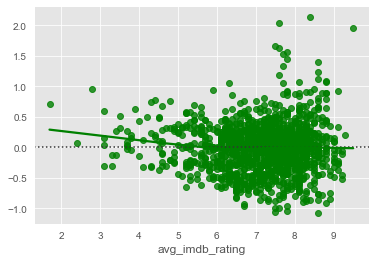

In [164]:
sns.residplot( y4_train, y4_train_pred,lowess=True, color="g")

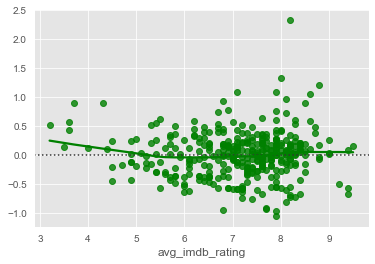

In [167]:
sns.residplot( y4_test, y4_pred, lowess=True, color="g")

With Lasso being our best model, we will now check to run this on the full TV show data set.

In [193]:
filename = 'finalized_tv__model.sav'
pickle.dump(lasso3, open(filename, 'wb'))

In [195]:
#17% accuracy
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X4_test,y4_test)
print(result)

0.17171811111957835


In [166]:

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(tv_features,tv_target)

tv_target_pred = lasso.predict(tv_features)

tv_rmse = np.sqrt(metrics.mean_squared_error(tv_target, tv_target_pred))
print('Target Error: '+ str(tv_rmse) )

Target Error: 1.0046860219968308
